# Introduction to Regression with Neural Networks in TensorFlow

In [2]:
# Importing tensorflow
import tensorflow as tf

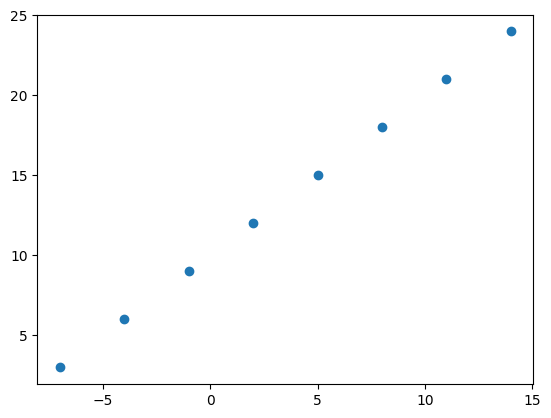

In [3]:
# Creating data to view and fit:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create target/label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,y)

In [4]:
y == X + 10 # This is the relationship that we want the NN to learn. So our dependent variable Y is dependent on 10 + independent variable X

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [5]:
input_shape  = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # Scalars are 0-rank tensors

((), ())

In [6]:
X[0].ndim

0

In [7]:
# Turning the NumPy arrays into tensors
X = tf.cast(X, dtype=tf.float32) #float32 because thats what the model uses
y = tf.cast(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape  = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # It is a scalar because we are taking 1 input feature, to predict 1 output, so -7 to guess 3.

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

In [9]:
# Creating a model - define the input and output layers, as well as the hidden layers.
# Complie the model - define the loss function (it tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning)
# and evaluation metrics ( What we can use to interpret the performance of our model).
# Fitting a model - letting a model try to find patterns between X & y

# Step 1 -  Get data ready (turn into tensors) (figure out the shape of ur input and output)
# Step 2 - Build or pick a pretrained model
# Step 3 - Fit the model to the data and make a prediction
# Step 4 - Evaluate the model
# Step 5 - Improve through Experimentation

# How it pretty much looks like

# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(3,)), #3 inputs
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"), 
#     tf.keras.layers.Dense(1, activation=None), # 1 output
# ])

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(lr=0.0001), # the lower the learning rate the less steps the model takes when trying to improve.
#               metrics=["mae"])

# model.fit(X_train, y_train, epochs = 50)

In [10]:
# Seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API (its like saying I wanna create a model and i want you to sequentially go thru the following)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # We are taking 1 number to predict 1 number
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error, less prone to outliers in dataset.
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 9.7674 - mae: 9.7674
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6349 - mae: 9.6349
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.5024 - mae: 9.5024
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.3699 - mae: 9.3699
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.2374 - mae: 9.2374


In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a predict
# Our prediction is off by a loss of 10 units!
model.predict(tf.expand_dims([17.0], axis=-1)) # we are expanding dims again because thats wht the model was trained on

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[21.15453]], dtype=float32)

### Improving the model

In [13]:
# We can improve our model, by altering the steps we took to create a model.
# 1. Creating a model -  we might add more layers, increase neurons, and change the activation functions of each layer
# 2. Compiling a model -  we might change the optimization function, or learning rate (hyperparameter) of the optimizer
# 3. Fiting a model -  we might fit a model for more epochs or give the model more data


## Common ways - 
# Increase number of hidden units/ or decrease
# Change activation functions
# Change the optimization function
# Change the learning rate. ( one of the most important ones we can tune)

In [14]:
# Lets rebuild our model this time with some changes

# 1. Create the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Model Compiling:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 12.0385 - mae: 12.0385
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.4826 - mae: 11.4826
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9139 - mae: 10.9139
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3310 - mae: 10.3310
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.7234 - mae: 9.7234
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.0904 - mae: 9.0904
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.4250 - mae: 8.4250
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.7711 - mae: 7.7711
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.0643 - mae: 7.0643
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.3032 - mae: 6.3032
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.4820 - mae: 5.4820
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5942 - mae: 4.5942
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [15]:
model.predict(tf.expand_dims([17.0], axis=-1))  # So just adding a layer and more epochs reduces our loss  alot
# However it seems like our model is actually overfitting hmm..

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[32.272327]], dtype=float32)

In [16]:
# lets try it again

# 1. Creating the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'] )

# 3. Fitting the model:
model.fit(tf.expand_dims(X ,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 14.4012 - mae: 14.4012
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.9407 - mae: 13.9407
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.4838 - mae: 13.4838
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.0281 - mae: 13.0281
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.5713 - mae: 12.5713
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.1109 - mae: 12.1109
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.6446 - mae: 11.6446
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.1700 - mae: 11.1700
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.6847 - mae: 10.6847
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1861 - mae: 10.1861
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.6718 - mae: 9.6718
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.1390 - mae: 9.1390
Epoch 13/100
1/1 ━━━━━━━━━━━

In [17]:
model.predict(tf.expand_dims([17.0], axis=-1)) # ahh it seems like reducing the neurons and setting the activation to None, increased the loss however made the model more accurate ...hmm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[30.840376]], dtype=float32)

In [18]:
# lets try it again with a new optimizer

# 1. Creating the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'] )

# 3. Fitting the model:
model.fit(tf.expand_dims(X ,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - loss: 12.9172 - mae: 12.9172
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.2675 - mae: 12.2675
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6114 - mae: 11.6114
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.9461 - mae: 10.9461
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.2696 - mae: 10.2696
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.5797 - mae: 9.5797
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8738 - mae: 8.8738
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.1494 - mae: 8.1494
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.4040 - mae: 7.4040
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.7861 - mae: 6.7861
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.8236 - mae: 6.8236
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.0968 - mae: 7.0968
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[26.379763]], dtype=float32)

### Evaluating a model

In [20]:
# When it comes to evaluation its a good idea to visualize
# the data -what data are we working with? what does it look like?
# the model itself - what does our model look like ?
# the training of a model - How does a model perform while it learns?
# the predictions of the model -  how do the predictions of a model line up against the ground truth?

In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Labels for the dataset
y = X + 10 # the pattern we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

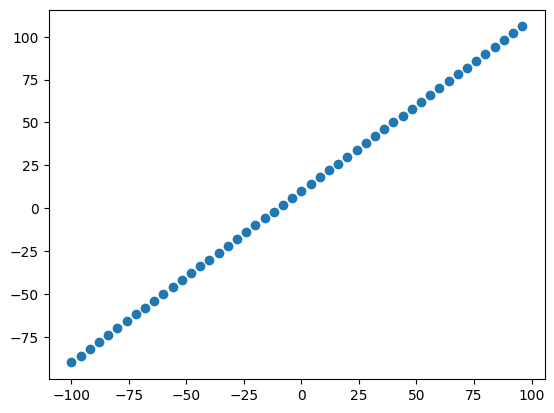

In [23]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets
* Training set -  The model learns from this data, which is 70-80% of the total data
* Validation set - The model gets tuned on this data, which is 10% ofthe data
* Test set -  The model gets evaluated on this data to test what is learned, typically 10-15% of the data.

In [24]:
# Checking the length of how many samples of we have:
len(X)

50

In [25]:
# Spliting the data into train and test sets
X_train = X[:40] # taking the first 40 training samples.
X_test = X[40:] # the last 10 samples.

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test) 

(40, 10)

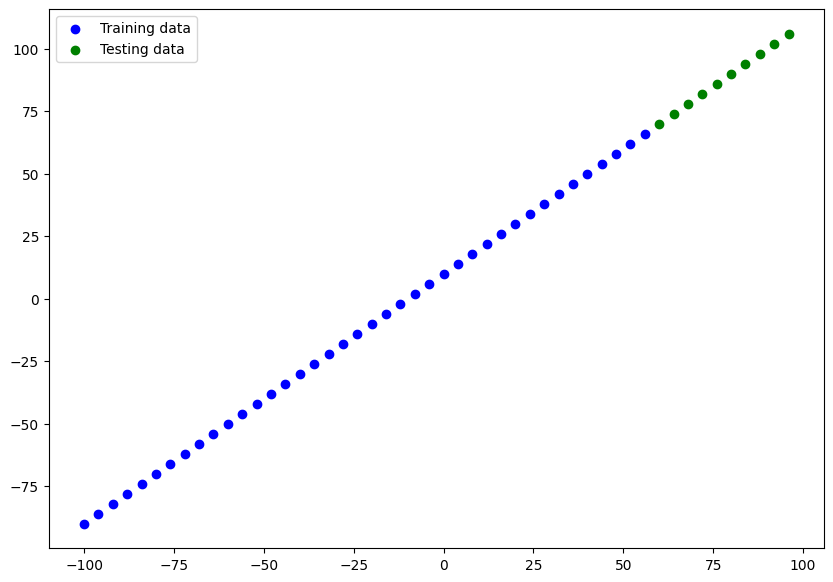

In [26]:
# Visualizing the train and test sets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [27]:
# Lets build a neural network for this dataset

tf.random.set_seed(42)

# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),#Setting the input shape here, X[0].shape gives nthn its just 1 number, its a scalar (0 rank tensor), so we give 1 here.
    tf.keras.layers.Dense(1)
])
    

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose 0 is silent.

In [28]:
model.summary() # Shows how our model looks, all the layers etc.
# Total params -  total parameters in the model 
# trainable params -  These are the parameters (patterns) the model can update as it trains. ( weight / bias)
# Non-trainable params - These parameters arent updated during training ( when you bring in already learnt patterns or parameters
# from other models during TRANSFER LEARNING)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [29]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[ 68.708755],
       [ 73.19488 ],
       [ 77.681   ],
       [ 82.16713 ],
       [ 86.65325 ],
       [ 91.13938 ],
       [ 95.6255  ],
       [100.111626],
       [104.597755],
       [109.08388 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [31]:
# Lets make a function to see how our predictions are to our data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """Plots Training data, test data and compares predictions to ground truth"""
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend()
    plt.show()

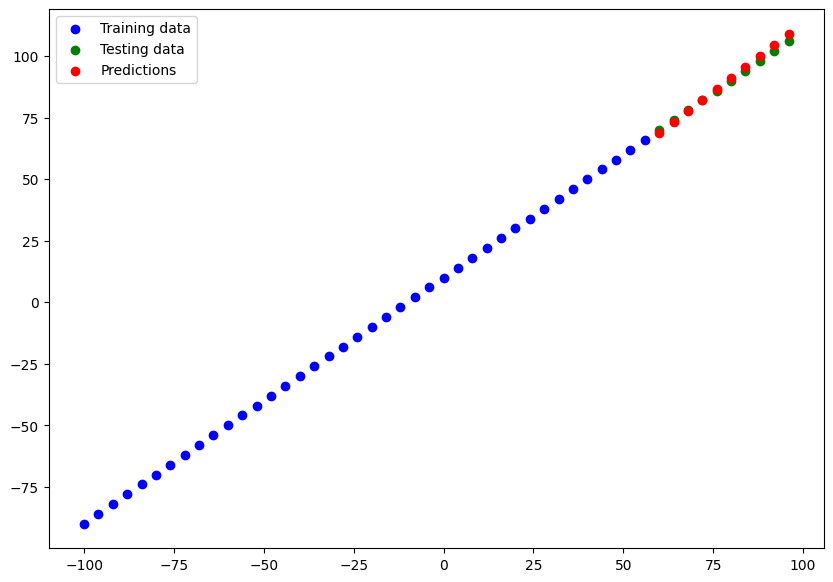

In [32]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [33]:
# Lets do 3 modeling experiments:
# model_1 - same as the original model, 1 layer, trained for 100 epochs
# model_2 - 2 layers, trained for 100 epochs
# model_3 - 2 layers, trained for 500 epochs

In [34]:
# setting a seed:
tf.random.set_seed(42)

# Building model_1:
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


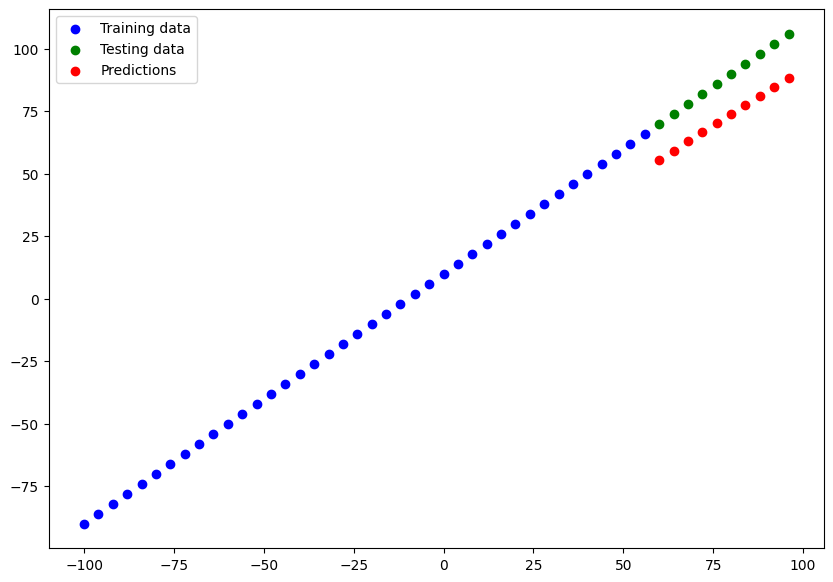

In [35]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [36]:
model_1.evaluate(y_test, y_pred_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 9.0428 - mae: 9.0428


[9.042840957641602, 9.042840957641602]

In [37]:
mae = tf.keras.losses.MeanAbsoluteError()
mae_1 = mae(y_test, tf.squeeze(y_pred_1)) # We are squeezing it because of the extra dimension in y_pred_1
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=16.040843963623047>

In [38]:
y_pred_1.shape , y_test.shape ## see??

((10, 1), TensorShape([10]))

In [39]:
# Model 2:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_2.fit(X_train , y_train, epochs = 100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


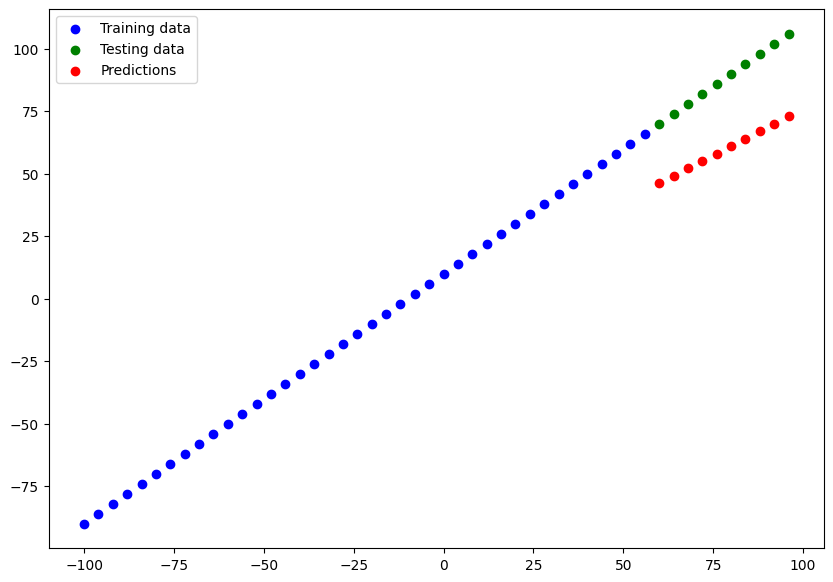

In [40]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [41]:
model_2.evaluate(y_test, y_pred_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.4239 - mse: 55.1150


[7.423948764801025, 55.115013122558594]

In [42]:
# Building model 3

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


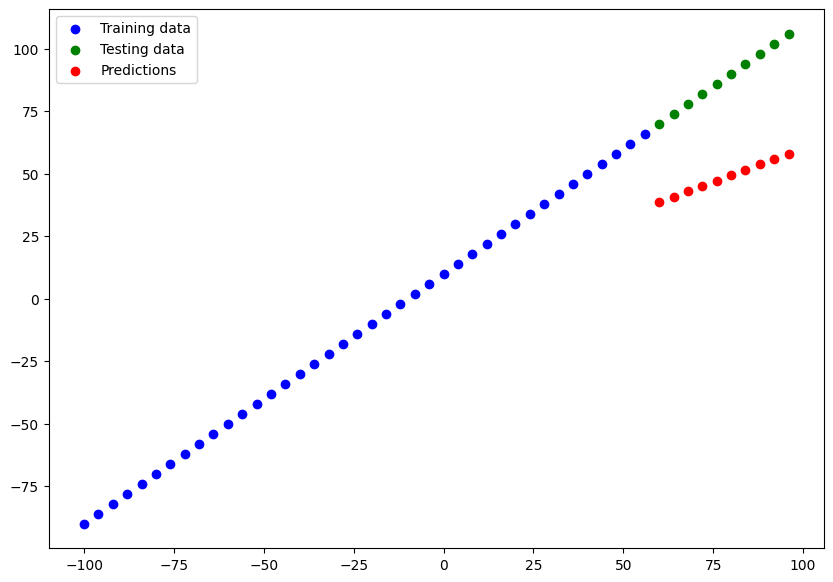

In [43]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [44]:
model_3.evaluate(y_test, y_pred_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 5.3847 - mse: 28.9949


[5.384688377380371, 28.9948673248291]

In [45]:
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=39.62378692626953>

In [46]:
# Our model performed even worse! This shows that tuning all hyperparameters this high even if it feels like
# it may increase the accuracy is not TRUE! we overfitted the model here.

In [47]:
# One good habit in ML is to track results of experiments and there is a component to help with that.
# Tensorboard -  a component of Tensorflow Library to help track modelling experiments.

### A larger example

In [48]:
import pandas as pd

In [49]:
# Read Insurance dataset
insurance = pd.read_csv('../data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
# Lets try one-hot encode our data_frame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [57]:
# Create X & y features
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot['charges']

In [58]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [59]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [61]:
# Lets create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train.head() # randomly shuffled! just what we want

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [64]:
X_train.shape

(1070, 11)

In [65]:
# Build a neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100) # The reason it worked without us converting it to tensors is because it is a pandas data, which is built on top of numpy...and tensorfow deals with numpy arrays

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 8714.8340 - mae: 8714.8340  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 7513.2251 - mae: 7513.2251
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 7341.7129 - mae: 7341.7129
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7499.6836 - mae: 7499.6836 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 7744.9023 - mae: 7744.9023
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 7703.6406 - mae: 7703.6406
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 7344.3877 - mae: 7344.3877
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 7722.4233 - mae: 7722.4233
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 7353.2808 - mae: 7353.2808
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 7803.4927 - mae: 7803.4927
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 7401.1880 - mae: 7401.1880
Epoch 12/100
34/34 ━━━━━━━━━━

In [67]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8059.1567 - mae: 8059.1567 


[8059.15673828125, 8059.15673828125]

In [ ]:
# Right now it looks like our model isnt performing too well, so lets try and improve it!

In [ ]:
# Set random seed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # We added an extra layer 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # and added adam optimizer
                          metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 13280.6914 - mae: 13280.6914 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 13100.3096 - mae: 13100.3096
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 12740.1377 - mae: 12740.1377
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 12056.5908 - mae: 12056.5908
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 10929.8340 - mae: 10929.8340
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 9507.8525 - mae: 9507.8525 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 8192.8223 - mae: 8192.8223
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 7540.4019 - mae: 7540.4019
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 7439.6587 - mae: 7439.6587
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 7415.8940 - mae: 7415.8940
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 7395.7642 - mae: 7395.7642
Epoch 12/100
34/34

In [76]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4825.3911 - mae: 4825.3911 


[4825.39111328125, 4825.39111328125]

In [77]:
# Lets try to improve even further:
# Set random seed
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13274.5332 - mae: 13274.5332   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 13079.8369 - mae: 13079.8369
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 12692.0498 - mae: 12692.0498
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 11950.4844 - mae: 11950.4844
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 10752.1025 - mae: 10752.1025
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 9303.9375 - mae: 9303.9375
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 8055.2446 - mae: 8055.2446
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 7521.7583 - mae: 7521.7583
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 7445.6245 - mae: 7445.6245
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 7422.7227 - mae: 7422.7227
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 7402.1147 - mae: 7402.1147
Epoch 12/200
34/34 

In [78]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3398.4580 - mae: 3398.4580 


[3398.4580078125, 3398.4580078125]

In [84]:
results = {
    "Insurance_Model_1": insurance_model.evaluate(X_test, y_test),
    "Insurance_Model_2": insurance_model_2.evaluate(X_test,y_test),
    "Insurance_Model_3": insurance_model_3.evaluate(X_test, y_test)
}
evaluation = pd.DataFrame(results)
evaluation

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8059.1567 - mae: 8059.1567 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4825.3911 - mae: 4825.3911 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3398.4580 - mae: 3398.4580 


,Insurance_Model_1,Insurance_Model_2,Insurance_Model_3
0,8059.156738,4825.391113,3398.458008
1,8059.156738,4825.391113,3398.458008


In [ ]:
# How long should we train for? Tensorflow has a solution called EarlyStopping! it automatically stops training when your model stops improving.
# If the metric does not improve for a certain number of epochs, training stops early.
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',      # what metric to watch
#     patience=3,              # how many epochs to wait before stopping
#     restore_best_weights=True  # revert to best model weights
# )

# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=100,
#     callbacks=[early_stop]
# )

### Preprocessing data (normalization and standardization)

In [85]:
# Neural networks tend to prefer Normalization
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
# We can see that age and bmi, they are on different scales...Normalization will bring them to a common scale.
# Scale/Normalization - Converts all values to between 0 and 1 whilst preserving the original distribution. Scikit learn MinMaxScaler does this. It is the default scaler for Neural Networks.
# Standardization - Removes the mean and divides each value by the standard deviation -  Scikit Learn StandardScaler func does this. 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [87]:
# Read Insurance dataset
insurance = pd.read_csv('../data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
from sklearn.compose import make_column_transformer # Convenience wrapper for columntransformer, (no need to name them)
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['smoker', 'region'])
)

# Create X & y
X = insurance.drop(columns=['charges'])
y = insurance['charges']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to the training data.
ct.fit(X_train)

# Transform training and testing data with Normalization & one hot encoding

X_train_normal = ct.transform(X_train)  # you could have also done ct.fit_transform(X_train) instead of fitting separately
X_test_normal = ct.transform(X_test)


In [93]:
# What the data used to look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [91]:
# What does the data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        ])

In [ ]:
X_train.shape, X_train_normal.shape # due to our one hot encoding we have added some extra columns to the normalized data.

((1070, 6), (1070, 9))

In [95]:
# Now lets build a neural network model on it and see how it goes:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_4.fit(X_train_normal, y_train, epochs=200) 

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13344.7295 - mae: 13344.7295   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 13339.0049 - mae: 13339.0049
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 13324.4824 - mae: 13324.4824
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 13293.1592 - mae: 13293.1592
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 13235.8906 - mae: 13235.8906
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 13143.5166 - mae: 13143.5166
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 13007.4141 - mae: 13007.4141
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 12819.1611 - mae: 12819.1611
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 12570.7715 - mae: 12570.7715
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 12254.6357 - mae: 12254.6357
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 11867.7646 - mae: 11867.7646
Epoch 1

In [96]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3187.9563 - mae: 3187.9563 


[3187.956298828125, 3187.956298828125]